<a href="https://colab.research.google.com/github/GbotemiB/DSN-2023-Hackathon/blob/main/2023_DSN_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#storing the data path into variables
data_path = "data/Housing_dataset_data.csv"

In [2]:
#importing libraries for analysis
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [3]:
#reading the files with pandas and storing it into variables
data = pd.read_csv(data_path)

In [4]:
#the first 5 top row
data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [5]:
#the size of the data data and test data
data.shape

(14000, 7)

## Analysis

In [ ]:
#giving more infomation about the data data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [6]:
#a simple desciptive analysis of the data data
data.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [7]:
#checking for duplicates
data.duplicated().sum()

0

In [8]:
#the count of missing data in the columns
data.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [9]:
#checking the value counts for the ID columns. This shows that the ID column is not a unique column
data.ID.value_counts()

583      3
1438     3
1330     3
2473     3
1531     3
        ..
12986    1
10089    1
6406     1
6070     1
8787     1
Name: ID, Length: 10182, dtype: int64

In [10]:
#showing the percentage of the missing data
(data.isna().sum() / len(data)) * 100

ID                0.000000
loc              12.950000
title            12.300000
bedroom          12.850000
bathroom         12.892857
parking_space    12.935714
price             0.000000
dtype: float64

In [11]:
#value counts of the location column
data['loc'].value_counts(sort=True)

Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: loc, dtype: int64

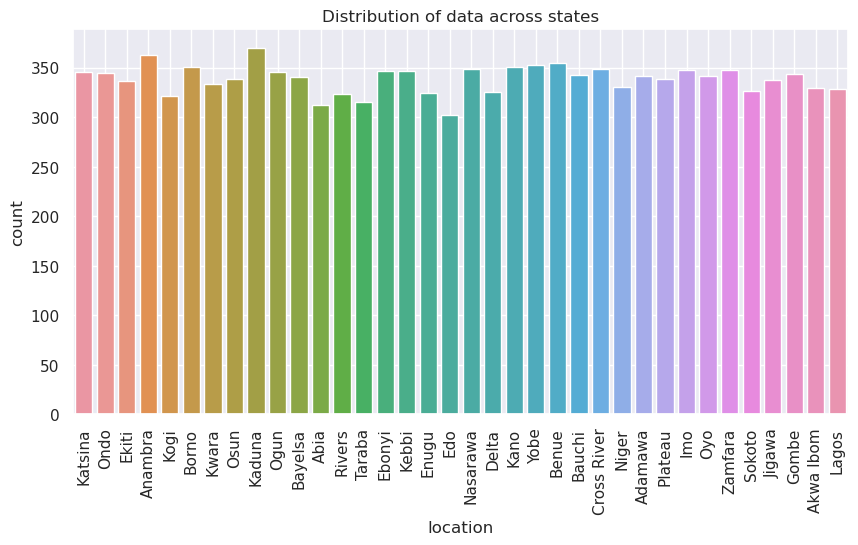

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='loc')
plt.xticks(rotation=90)
plt.xlabel('location')
plt.title('Distribution of data across states')

plt.grid(True)
plt.show()

In [13]:
#the value count for the title column
data['title'].value_counts()

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

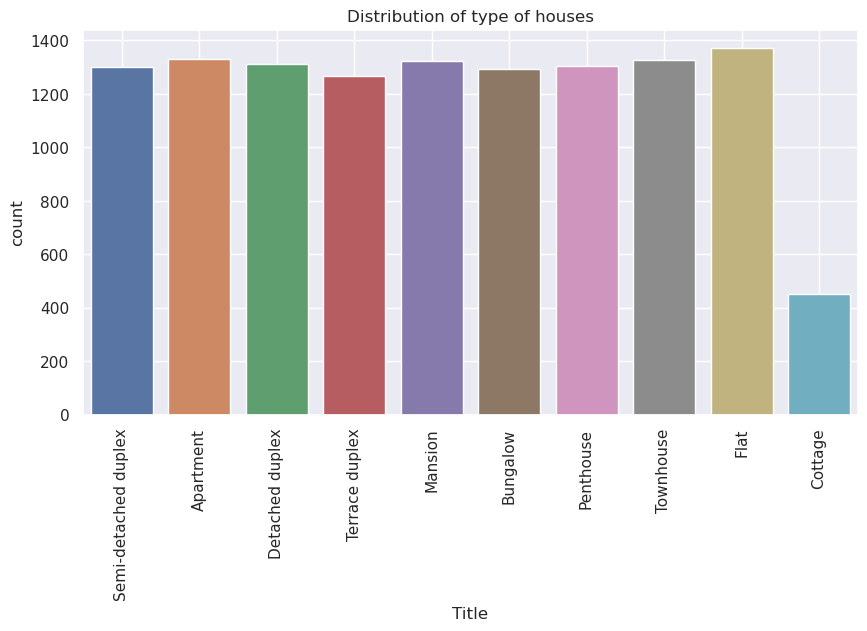

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='title')
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.title('Distribution of type of houses')

plt.grid(True)
plt.show()

In [15]:
#the value count for the bedroom column
data['bedroom'].value_counts()

5.0    1789
2.0    1741
1.0    1738
3.0    1736
4.0    1641
6.0     908
7.0     888
9.0     883
8.0     877
Name: bedroom, dtype: int64

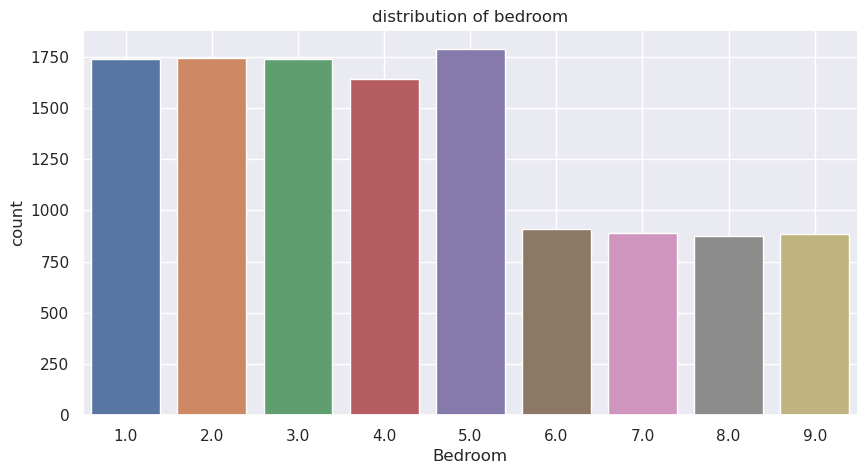

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='bedroom')
plt.xlabel('Bedroom')
plt.title('distribution of bedroom')

plt.grid(True)
plt.show()

In [17]:
#the value count for the bathroom column
data['bathroom'].value_counts()

1.0    3272
2.0    3255
7.0    1156
5.0    1143
6.0    1138
3.0    1119
4.0    1112
Name: bathroom, dtype: int64

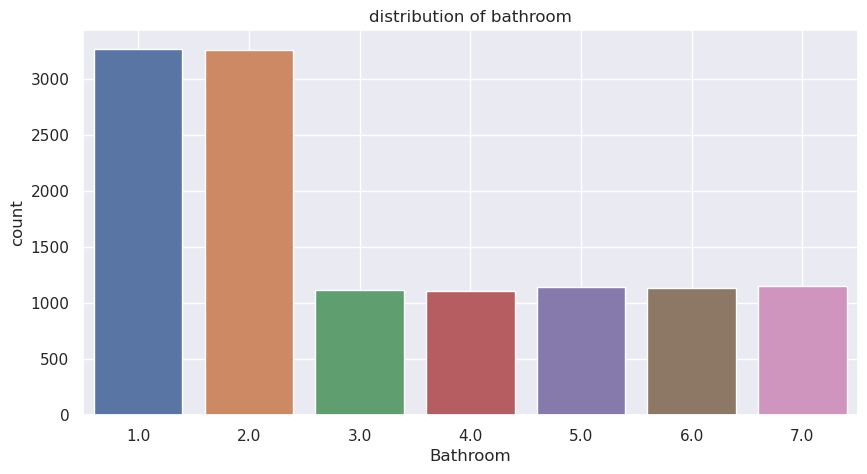

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='bathroom')
plt.xlabel('Bathroom')
plt.title('distribution of bathroom')

plt.grid(True)
plt.show()

In [19]:
#the value count for the parking_space column
data['parking_space'].value_counts()

4.0    2419
2.0    2394
3.0    2378
1.0    2324
6.0    1345
5.0    1329
Name: parking_space, dtype: int64

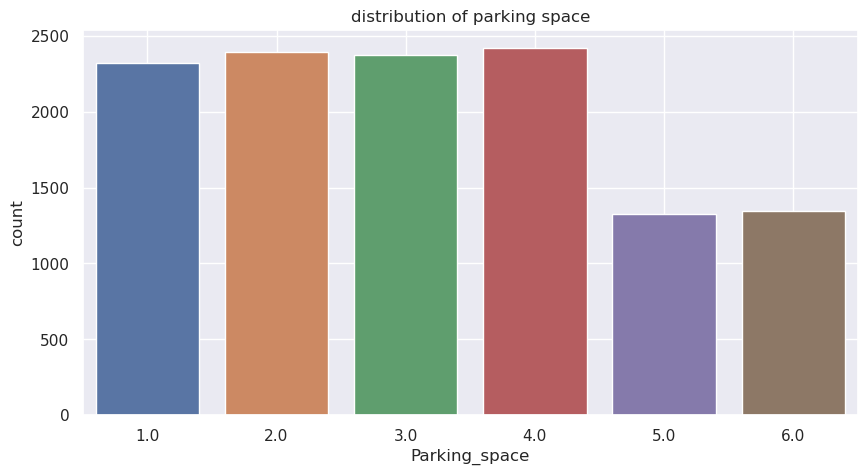

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='parking_space')
plt.xlabel('Parking_space')
plt.title('distribution of parking space')

plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

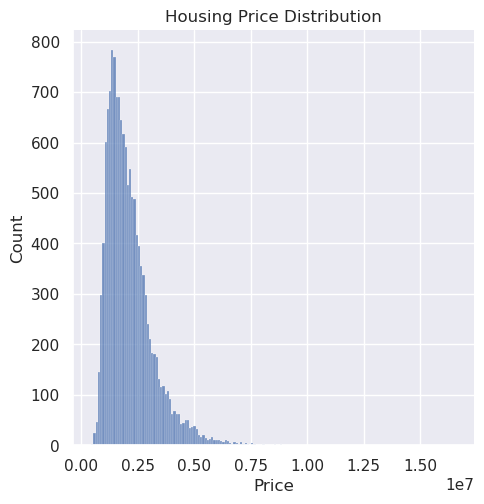

In [21]:
#plotting the housing price distribution data
plt.figure(figsize=(10,5))
sns.displot(data=data, x='price')
plt.xlabel('Price')
plt.title('Housing Price Distribution')

plt.grid(True)
plt.show()

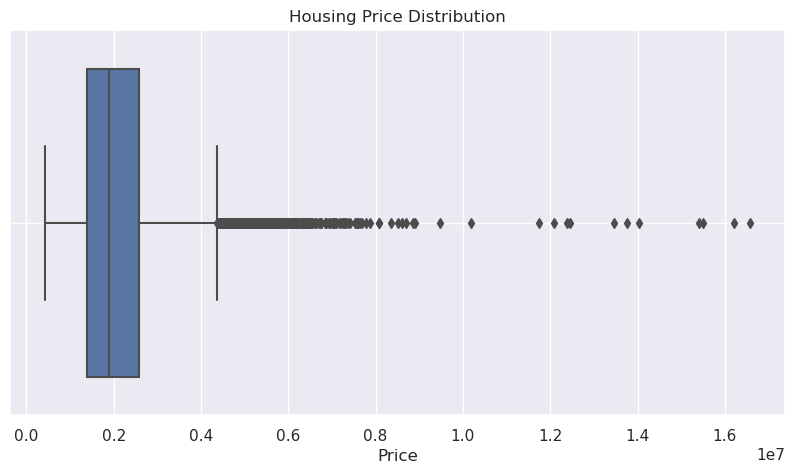

In [22]:
#using a boxplot to check the distribution of the data
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='price')
plt.xlabel('Price')
plt.title('Housing Price Distribution')

plt.grid(True)
plt.show()

In [23]:
#grouping the data by location to check for the average price across the data
data_loc_groupby = data.groupby(data['loc']).mean(numeric_only=True)

In [24]:
data_loc_groupby.head()

,ID,bedroom,bathroom,parking_space,price
loc,,,,,
Abia,5055.266026,4.131387,3.137931,3.373134,1.717083e+06
Adamawa,4405.217009,4.269625,3.020408,3.087108,1.905287e+06
Akwa Ibom,4781.866261,4.275261,3.090592,3.142349,2.725454e+06
Anambra,4951.118457,4.078689,3.058065,3.279365,2.337230e+06
Bauchi,4831.602339,4.435714,3.359060,3.130872,1.772961e+06


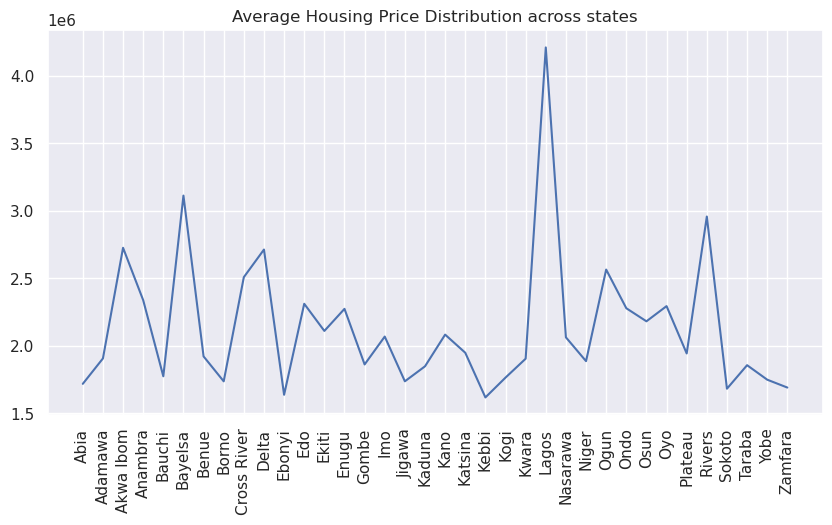

In [25]:
plt.figure(figsize=(10,5))
plt.plot(data_loc_groupby['price'], label='loc')
# plt.xlabel('Location')
plt.title('Average Housing Price Distribution across states')
plt.xticks(rotation=90)

plt.show()

In [26]:
data.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

<Figure size 1000x500 with 0 Axes>

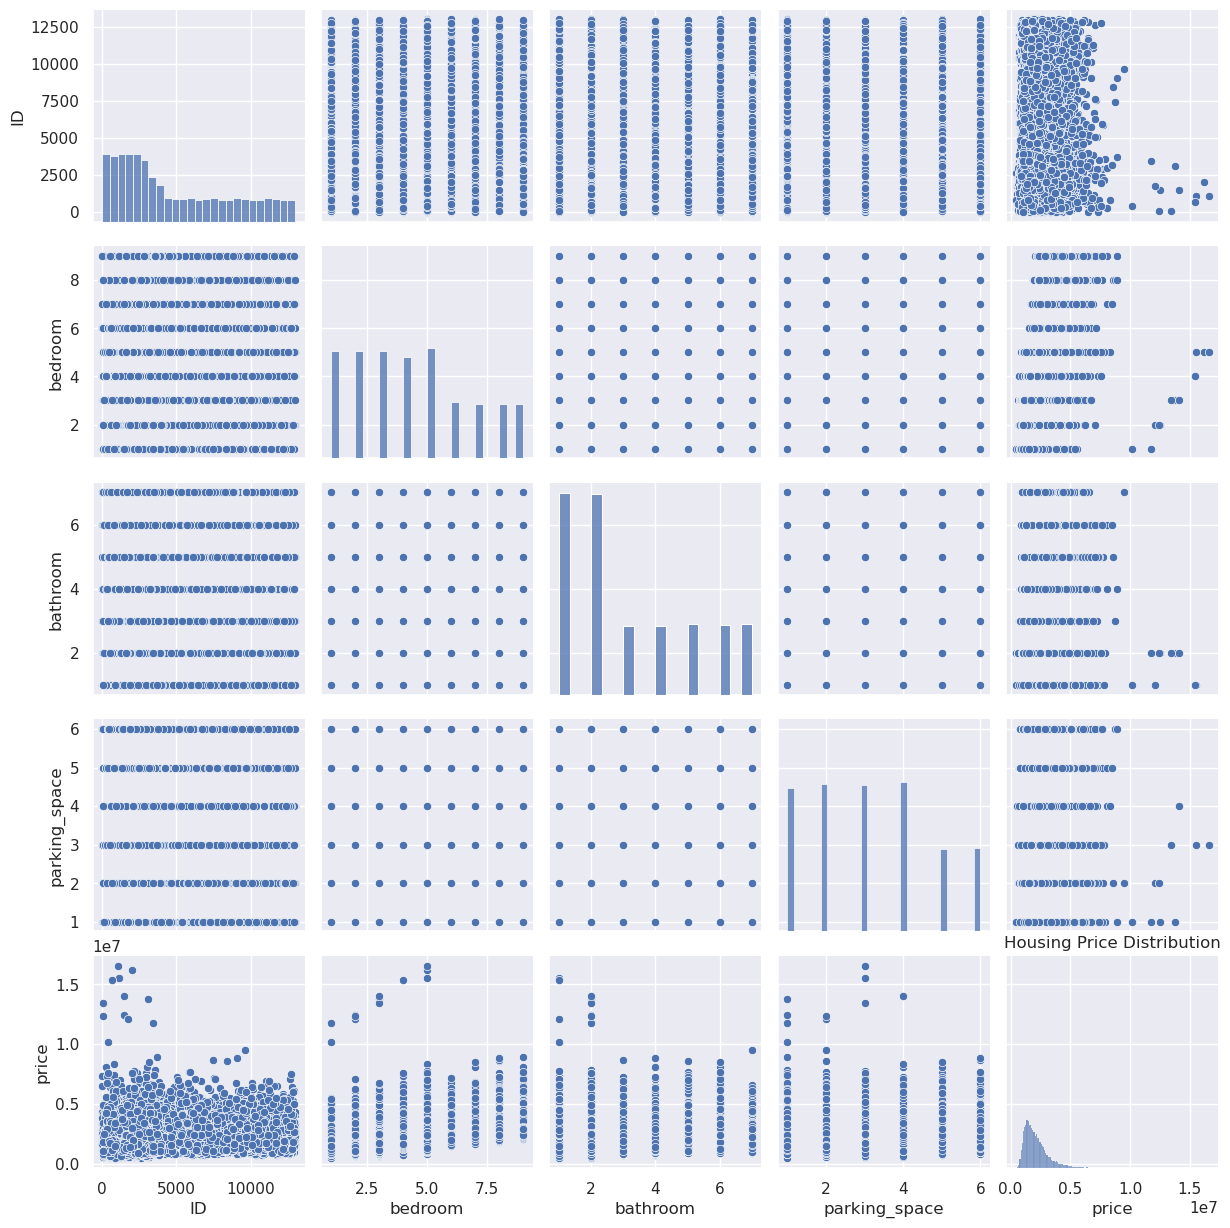

In [27]:
#a pairplot of the data
plt.figure(figsize=(10,5))
sns.pairplot(data=data)
plt.xlabel('Price')
plt.title('Housing Price Distribution')

plt.grid(True)
plt.show()

/tmp/ipykernel_2563/3110391084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = data.corr()


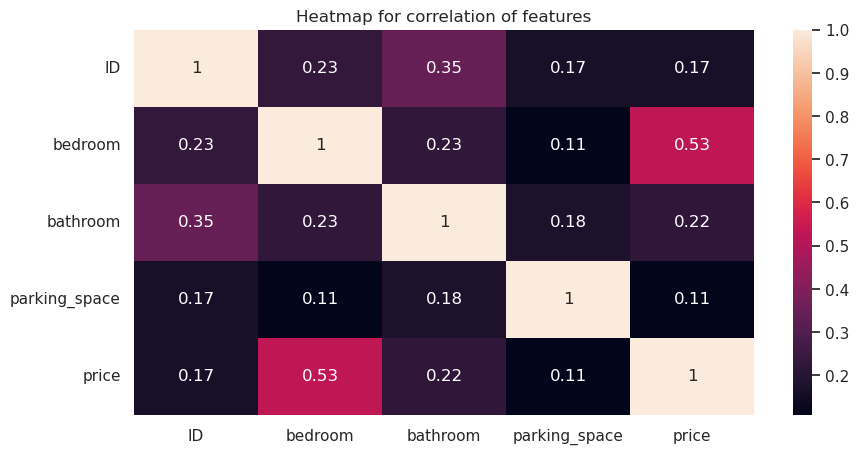

In [28]:
#correlation of the data columns against each column
corr_ = data.corr()

plt.figure(figsize=(10,5))
sns.heatmap(data=corr_, annot=True)
plt.title('Heatmap for correlation of features')

plt.grid(True)
plt.show()